# Erick José Pineda Amézquita  -   17012140


==========================================================================================================================

# Red neuronal Convolucional o Convolutional Network

Problema a analizar: **Analizar diversas imagenes de paisajes, frutas o verduras, el objetivo es clasificar alrededor de 25k imágenes de tamaño 150x150 distribuidas en 6 categorías según los dataset proporcinados en Kaggle**  

### Tomar en cuenta que se están utilizando 2 dataset totalmente distintos, uno es para comparar lugares y otro es para comparar verduras y frutas, ambos utilizan los mismos algoritmos.


Fuente de datos:   
https://www.kaggle.com/puneet6060/intel-image-classification  
https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification  


Se han descargado 3 directorios con mas de mil imagenes:  


![Titulo](img/i0.JPG)




  
   
   
  
  
Acerca del set de datos:  

Estos datos contienen alrededor de 25k imágenes de tamaño 150x150 distribuidas en 6 categorías.  

{'edificios' -> 0,  
'bosque' -> 1,  
'glaciar' -> 2,  
'montaña' -> 3,  
'mar' -> 4,  
'calle' -> 5}   

Los datos de entrenamiento, prueba y predicción están separados en cada archivo zip.  
Hay alrededor de 14k imágenes en Train, 3k en Test y 7k en Prediction.  
Intel publicó inicialmente estos datos en https://datahack.analyticsvidhya.com para organizar un desafío de clasificación de imágenes.  

### Observación:  
Los dataset no se cargaron a Github ya que el primero es de 350MB y el segundo es de 2GB



In [1]:
##Librerias básicas:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import loadtxt
import cv2, os, random

Se importan las librerías que servirán para procesamiento paralelo como TensorFlow y Keras

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Se cargan librerías de Keras

In [4]:
from tensorflow.python.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


***
### Cargando las imagenes de lugares
Se conoce las categorias que hay en cada data set.

In [5]:
name_label = {"buildings":0,"forest":1,"glacier":2,"mountain":3,"sea":4,"street":5}
name = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

Metodo genérico para la carga de imagenes

Se crea un metodo para recorrer distintos data set, en este caso, son 2 pero podrían ser mas, por ejemplo de evaluación, etc. 

In [6]:
def load_images(name_label,train,test,size):
    image_folders = [train, train]
    data_set = []
    for test_train_folder in image_folders:
        directory = test_train_folder
        imgs = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = name_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, (size, size))
                imgs.append(curr_img)
                labels.append(curr_label)
        c = list(zip(imgs, labels))
        random.shuffle(c)
        imgs, labels = zip(*c)
        imgs = np.array(imgs, dtype = "int32")
        labels = np.array(labels, dtype = "int32")
        data_set.append((imgs, labels))
    return data_set

Se cargan los datos en las variables de entrenamiento y de testing

In [7]:
(img_train, labels_train), (img_test, labels_test) = load_images(name_label,"./data/seg_train","./data/seg_test",150)

### Exploración de los datos ya divididos  
Notar que se incluyen las imágenes y las etiquetas

In [11]:
print("Imagenes entrenamiento: "+str(img_train.shape))
print("Labels entrenamiento: "+str(labels_train.shape))
print("Imagenes prueba: "+str(img_test.shape))
print("Labels prueba: "+str(labels_test.shape))

Imagenes entrenamiento: (14034, 150, 150, 3)
Labels entrenamiento: (14034,)
Imagenes prueba: (14034, 150, 150, 3)
Labels prueba: (14034,)


## Ejemplo de las imagenes cargadas en el dataset

In [14]:
def plot_img(img, label):
    plt.figure()
    plt.imshow(img)
    plt.grid(False)
    plt.title(name[label])
    plt.show()
    return

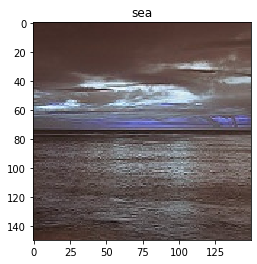

In [15]:
index = np.random.randint(img_train.shape[0])
plot_img(img_train[index], labels_train[index])

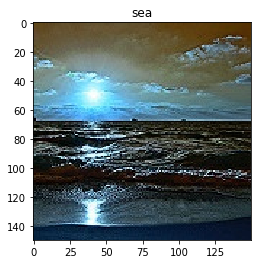

In [16]:
index = np.random.randint(img_train.shape[1])
plot_img(img_train[index], labels_train[index])

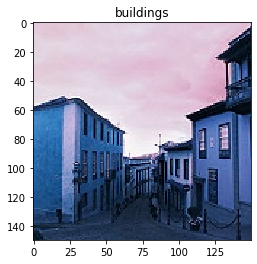

In [17]:
index = np.random.randint(img_train.shape[2])
plot_img(img_train[index], labels_train[index])

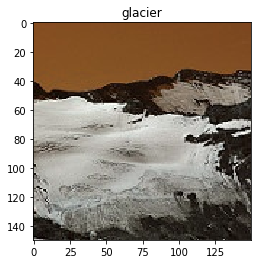

In [18]:
index = np.random.randint(img_train.shape[3])
plot_img(img_train[index], labels_train[index])

### Creación del modelo por medio de redes neuronales convolucionales (Conv2D)

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

W0919 16:28:43.684039  4500 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:1666: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               9

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
norm_img_train = img_train/255.0
norm_img_train.shape

(14034, 150, 150, 3)

In [24]:
history = model.fit(norm_img_train, labels_train, batch_size=128, epochs=10, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/10
11227/11227 [==============================] - 590s 53ms/sample - loss: 1.2375 - acc: 0.5368 - val_loss: 0.9187 - val_acc: 0.6548
Epoch 2/10
11227/11227 [==============================] - 350s 31ms/sample - loss: 0.8031 - acc: 0.7012 - val_loss: 0.7366 - val_acc: 0.7282
Epoch 3/10
11227/11227 [==============================] - 320s 29ms/sample - loss: 0.6336 - acc: 0.7731 - val_loss: 0.7909 - val_acc: 0.7022
Epoch 4/10
11227/11227 [==============================] - 330s 29ms/sample - loss: 0.5275 - acc: 0.8105 - val_loss: 0.7134 - val_acc: 0.7325
Epoch 5/10
11227/11227 [==============================] - 322s 29ms/sample - loss: 0.4599 - acc: 0.8347 - val_loss: 0.6643 - val_acc: 0.7634
Epoch 6/10
11227/11227 [==============================] - 315s 28ms/sample - loss: 0.3210 - acc: 0.8883 - val_loss: 0.7052 - val_acc: 0.7606
Epoch 7/10
11227/11227 [==============================] - 316s 28ms/sample - loss: 0.2106 - acc: 0.9316 -

## Predicciones del modelo 
Se analiza por medio de un ciclo for y se predice qué tipo de imagen es.  

**Observación:**  
Tomar en cuenta que la etiqueta de arriba es la imagen predecida y la de abajo la imagen real. 


In [25]:
for x in range(10):
    index = np.random.randint(img_test.shape[0])
    img = (np.expand_dims(img_test[index], 0))
    prediccion = model.predict(img)
    pred_img = np.argmax(prediccion[0])
    pred_label = name[pred_img]
    true_label = name[labels_test[index]]
    print(pred_label)
    print(true_label)
    print("================")

sea
sea
sea
sea
forest
forest
sea
buildings
sea
sea
street
street
buildings
buildings
mountain
mountain
buildings
buildings
buildings
buildings


***
# Ejemplo 2, para el caso que se desean identificar frutas

In [30]:
name_label = {"freshapples":0,"freshbanana":1,"freshoranges":2,"rottenapples":3,"rottenbanana":4,"rottenoranges":5}
name = ["freshapples", "freshbanana", "freshoranges", "rottenapples", "rottenbanana", "rottenoranges"]

Para poder correr el otro ejemplo de prueba, se opta por limpiar la memoria RAM, con la herramienta de garbage Colector de Python.

In [29]:
import gc
gc.collect()

16

In [31]:
(fimg_train, flabels_train), (fimg_test, flabels_test) = load_images(name_label,"./data/fruit_train","./data/fruit_test",50)

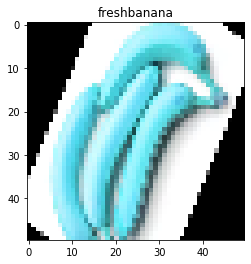

In [32]:
index = np.random.randint(fimg_train.shape[0])
plot_img(fimg_train[index], flabels_train[index])

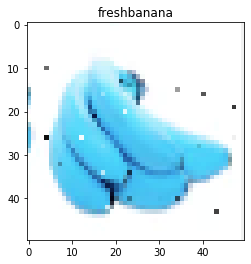

In [33]:
index = np.random.randint(fimg_train.shape[1])
plot_img(fimg_train[index], flabels_train[index])

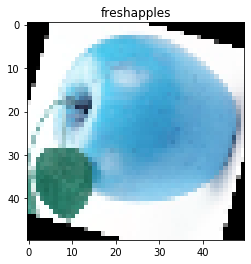

In [34]:
index = np.random.randint(fimg_train.shape[2])
plot_img(fimg_train[index], flabels_train[index])

In [35]:
print("Imagenes entrenamiento: "+str(fimg_train.shape))
print("Labels entrenamiento: "+str(flabels_train.shape))
print("Imagenes prueba: "+str(fimg_test.shape))
print("Labels prueba: "+str(flabels_test.shape))

Imagenes entrenamiento: (10901, 50, 50, 3)
Labels entrenamiento: (10901,)
Imagenes prueba: (10901, 50, 50, 3)
Labels prueba: (10901,)


In [36]:
model_f = Sequential()
model_f.add(Conv2D(32, (3, 3), activation = "relu", input_shape=(50, 50, 3)))
model_f.add(MaxPooling2D(2, 2))
model_f.add(Conv2D(32, (3, 3), activation = "relu"))
model_f.add(MaxPooling2D(2, 2))
model_f.add(Conv2D(64, (3, 3), activation = "relu"))
model_f.add(Flatten())
model_f.add(Dense(128, activation = "relu"))
model_f.add(Dense(6, activation = "softmax"))
model_f.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model_f.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [37]:
fnorm_img_train = fimg_train/255.0
fnorm_img_test = fimg_test/255.0

In [38]:
monitor_val_acc = EarlyStopping(monitor = "val_acc", patience = 3)
modelCheckpoint = ModelCheckpoint("fruits_batch_32.hdf5", save_best_only = True)

history_f = model_f.fit(fnorm_img_train, flabels_train, batch_size = 32, epochs = 10, validation_split = 0.2, callbacks = [monitor_val_acc, modelCheckpoint])
accuracy_f = model_f.evaluate(fnorm_img_test, flabels_test)[1]
print('Accuracy:', accuracy_f)

Train on 8720 samples, validate on 2181 samples
Epoch 1/10
8720/8720 [==============================] - 31s 4ms/sample - loss: 0.7294 - acc: 0.7321 - val_loss: 0.4154 - val_acc: 0.8533
Epoch 2/10
8720/8720 [==============================] - 30s 3ms/sample - loss: 0.3502 - acc: 0.8755 - val_loss: 0.2987 - val_acc: 0.8964
Epoch 3/10
8720/8720 [==============================] - 30s 3ms/sample - loss: 0.2500 - acc: 0.9099 - val_loss: 0.2315 - val_acc: 0.9221
Epoch 4/10
8720/8720 [==============================] - 30s 3ms/sample - loss: 0.1856 - acc: 0.9318 - val_loss: 0.1654 - val_acc: 0.9390
Epoch 5/10
8720/8720 [==============================] - 30s 3ms/sample - loss: 0.1395 - acc: 0.9508 - val_loss: 0.1841 - val_acc: 0.9321
Epoch 6/10
8720/8720 [==============================] - 29s 3ms/sample - loss: 0.1160 - acc: 0.9586 - val_loss: 0.1330 - val_acc: 0.9496
Epoch 7/10
8720/8720 [==============================] - 30s 3ms/sample - loss: 0.0988 - acc: 0.9646 - val_loss: 0.0991 - val_acc: 

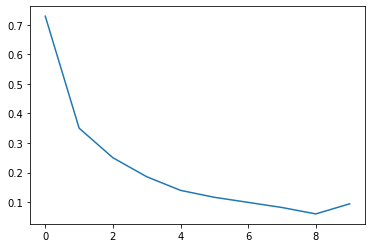

In [39]:
plt.figure()
plt.plot(history_f.history['loss'])
#plt.plot(history_f.history['val_loss'])

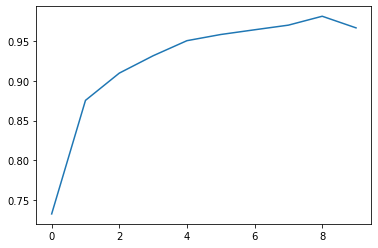

In [40]:
plt.figure()
plt.plot(history_f.history['acc'])
#plt.plot(history_f.history['val_acc'])

### Predicciones

In [41]:
for x in range(10):
    index = np.random.randint(fimg_test.shape[0])
    img = (np.expand_dims(fimg_test[index], 0))
    prediccion = model_f.predict(img)
    pred_img = np.argmax(prediccion[0])
    pred_label = name[pred_img]
    true_label = name[flabels_test[index]]
    print(pred_label)
    print(true_label)
    print("================")

rottenbanana
rottenbanana
rottenoranges
rottenoranges
freshbanana
rottenbanana
freshoranges
freshoranges
freshbanana
rottenbanana
freshoranges
freshapples
freshoranges
freshoranges
freshoranges
freshoranges
freshoranges
freshoranges
freshoranges
freshoranges


***
## BatchNormalization

In [42]:
model_fn = Sequential()
model_fn.add(Conv2D(32, (3, 3), activation = "relu", input_shape=(50, 50, 3)))
model_fn.add(BatchNormalization())
model_fn.add(MaxPooling2D(2, 2))
model_fn.add(Conv2D(32, (3, 3), activation = "relu"))
model_fn.add(BatchNormalization())
model_fn.add(MaxPooling2D(2, 2))
model_fn.add(Conv2D(64, (3, 3), activation = "relu"))
model_fn.add(BatchNormalization())
model_fn.add(Flatten())
model_fn.add(Dense(128, activation = "relu"))
model_fn.add(BatchNormalization())
model_fn.add(Dense(6, activation = "softmax"))
model_fn.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model_fn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 64)         

In [43]:
monitor_val_acc = EarlyStopping(monitor = "val_acc", patience = 3)
modelCheckpoint = ModelCheckpoint("fruits_norm_batch_16.hdf5", save_best_only = True)

history_fn = model_fn.fit(fnorm_img_train, flabels_train, batch_size = 36, epochs = 10, validation_split = 0.2, callbacks = [monitor_val_acc, modelCheckpoint])
accuracy_fn = model_fn.evaluate(fnorm_img_test, flabels_test)[1]
print('Accuracy:', accuracy_fn)

Train on 8720 samples, validate on 2181 samples
Epoch 1/10
8720/8720 [==============================] - 48s 6ms/sample - loss: 0.3825 - acc: 0.8680 - val_loss: 1.7792 - val_acc: 0.4232
Epoch 2/10
8720/8720 [==============================] - 35s 4ms/sample - loss: 0.1774 - acc: 0.9411 - val_loss: 0.4778 - val_acc: 0.8258
Epoch 3/10
8720/8720 [==============================] - 33s 4ms/sample - loss: 0.1117 - acc: 0.9631 - val_loss: 0.2459 - val_acc: 0.9110
Epoch 4/10
8720/8720 [==============================] - 32s 4ms/sample - loss: 0.0927 - acc: 0.9712 - val_loss: 0.2601 - val_acc: 0.9097
Epoch 5/10
8720/8720 [==============================] - 31s 4ms/sample - loss: 0.0664 - acc: 0.9771 - val_loss: 0.2189 - val_acc: 0.9198
Epoch 6/10
8720/8720 [==============================] - 32s 4ms/sample - loss: 0.0616 - acc: 0.9803 - val_loss: 1.6851 - val_acc: 0.6882
Epoch 7/10
8720/8720 [==============================] - 31s 4ms/sample - loss: 0.0372 - acc: 0.9876 - val_loss: 0.0933 - val_acc: 

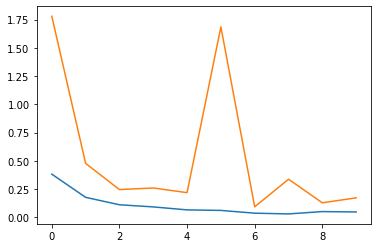

In [44]:
plt.figure()
plt.plot(history_fn.history['loss'])
plt.plot(history_fn.history['val_loss'])

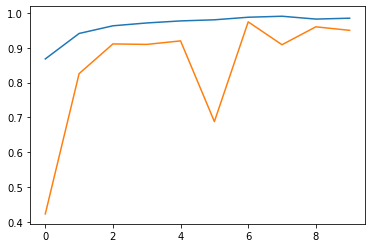

In [45]:
plt.figure()
plt.plot(history_fn.history['acc'])
plt.plot(history_fn.history['val_acc'])

### Predicciones

In [46]:
for x in range(10):
    index = np.random.randint(fimg_test.shape[0])
    img = (np.expand_dims(fimg_test[index], 0))
    prediccion = model_fn.predict(img)
    pred_img = np.argmax(prediccion[0])
    pred_label = name[pred_img]
    true_label = name[flabels_test[index]]
    print(pred_label)
    print(true_label)
    print("================")

freshoranges
rottenbanana
freshoranges
rottenapples
freshoranges
freshbanana
freshoranges
freshapples
freshoranges
freshapples
freshoranges
rottenapples
rottenbanana
rottenbanana
freshoranges
freshoranges
freshoranges
rottenapples
freshoranges
rottenoranges


Observar que en los ejemplos anteriores el modelo tiene cierto errores, si bien logra acertar en la mayoría, es importante hacer mención de esto.

In [47]:
best_model = load_model("fruits_norm_batch_16.hdf5")
layer_outputs = [layer.output for layer in best_model.layers]
activation_model = Model(inputs = best_model.input, outputs = layer_outputs)
activations = activation_model.predict(fimg_test)
activations

W0919 18:42:28.862994  4500 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0919 18:42:28.933286  4500 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0919 18:42:28.957539  4500 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be rem

[array([[[[5.27975224e-02, 0.00000000e+00, 2.17093155e-02, ...,
           0.00000000e+00, 5.04482314e-02, 1.57121401e-02],
          [5.27975224e-02, 0.00000000e+00, 2.17093155e-02, ...,
           0.00000000e+00, 5.04482314e-02, 1.57121401e-02],
          [5.27975224e-02, 0.00000000e+00, 2.17093155e-02, ...,
           0.00000000e+00, 5.04482314e-02, 1.57121401e-02],
          ...,
          [5.27975224e-02, 0.00000000e+00, 2.17093155e-02, ...,
           0.00000000e+00, 5.04482314e-02, 1.57121401e-02],
          [5.27975224e-02, 0.00000000e+00, 2.17093155e-02, ...,
           0.00000000e+00, 5.04482314e-02, 1.57121401e-02],
          [5.27975224e-02, 0.00000000e+00, 2.17093155e-02, ...,
           0.00000000e+00, 5.04482314e-02, 1.57121401e-02]],
 
         [[5.27975224e-02, 0.00000000e+00, 2.17093155e-02, ...,
           0.00000000e+00, 5.04482314e-02, 1.57121401e-02],
          [5.27975224e-02, 0.00000000e+00, 2.17093155e-02, ...,
           0.00000000e+00, 5.04482314e-02, 1.57121

In [ ]:
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[10, :, :, 14], cmap='viridis')
plt.show()

***
# Conclusiones

    * Se entrenó el modelo con mas de 13,000 imagenes, por tal razón el consumo computacional es alto a pesar de estar utilizando herramientas que ayudan a la eficiencia del procesamiento (como keras)
    * Se utilizan redes convulucionales para el caso en que se están procesando imagenes y se desea conocer su clasificación con un conjunto de imagenes aleatorias. 
    * Se utilizaron 10 epocas para el entrenamiento
    * Tuve varios reinicios en mi computadora ya que el algoritmo no terminaba de ejecutarse por esa razón puedo confirmar la importancia de utilizar Checkpoints.
    * El procesamiento de imagenes requiere bastantes recursos computacionales, he comprobado que es un proceso bastante tardado y que el menor de los errores puede provocar que el entrenamiento se interrumpa de forma que todo el trabajo se pierda.
    * En mi caso, al haber un corte de energía, la maquina se apaga, por tal razón también experimenté problemas ya que a veces el algoritmo tardaba hasta 6 horas en resolver.
    * Aunque no es parte del curso ni de aspecto de machine learning, pude identificar un algo consumo de memoria RAM por parte de Jupypter Notebooks, por tal razón investigué y Python también tiene un método para limpiar la memoria que no está en uso, tiene su propio Garbage Collector. Puedo concluir con agrado que ejecutar dicha instrucción ayudo a que mis modelos se pudieran entrenar, con una reducción de hasta el 80% del tiempo que tardaba sin haberlo ejecutado, en este caso al ejecutarse dos ejemplos distintos. 
    * Tomar en cuenta que se utilizaron dos data set para éste análisis: De Identificación de Frutas y de Identificación de lugares o edificios. 
    * Tomar en cuenta que los sets se amplian rotando las imagenes, es decir, que para la computadora una imagen rotada en cualquier ángulo y dirección va a ser una imagen diferente, por tal razón al analizar el data set, se podrán ver imagenes parecidas para nosotros los humanos. 
    *Si bien no se puede afirmar que utilizar Batch mejora la presición, la exactitud ni la eficiencia del modelo, se puede determinar que no está de más aplicarlo pues reduce por lo menos el procesamiento computacional, segun mis observaciones. 